In [2]:
library("INLA")
library("MASS")
summary(cement)
library("INLA")
m1 <- inla(y ~ x1 + x2 + x3 + x4, data = cement)
summary(m1)

       x1               x2              x3              x4           y         
 Min.   : 1.000   Min.   :26.00   Min.   : 4.00   Min.   : 6   Min.   : 72.50  
 1st Qu.: 2.000   1st Qu.:31.00   1st Qu.: 8.00   1st Qu.:20   1st Qu.: 83.80  
 Median : 7.000   Median :52.00   Median : 9.00   Median :26   Median : 95.90  
 Mean   : 7.462   Mean   :48.15   Mean   :11.77   Mean   :30   Mean   : 95.42  
 3rd Qu.:11.000   3rd Qu.:56.00   3rd Qu.:17.00   3rd Qu.:44   3rd Qu.:109.20  
 Max.   :21.000   Max.   :71.00   Max.   :23.00   Max.   :60   Max.   :115.90  


Call:
   c("inla.core(formula = formula, family = family, contrasts = contrasts, 
   ", " data = data, quantiles = quantiles, E = E, offset = offset, ", " 
   scale = scale, weights = weights, Ntrials = Ntrials, strata = strata, 
   ", " lp.scale = lp.scale, link.covariates = link.covariates, verbose = 
   verbose, ", " lincomb = lincomb, selection = selection, control.compute 
   = control.compute, ", " control.predictor = control.predictor, 
   control.family = control.family, ", " control.inla = control.inla, 
   control.fixed = control.fixed, ", " control.mode = control.mode, 
   control.expert = control.expert, ", " control.hazard = control.hazard, 
   control.lincomb = control.lincomb, ", " control.update = 
   control.update, control.lp.scale = control.lp.scale, ", " 
   control.pardiso = control.pardiso, only.hyperparam = only.hyperparam, 
   ", " inla.call = inla.call, inla.arg = inla.arg, num.threads = 
   num.threads, ", " blas.num.threads = blas.num.threads, keep = keep, 


In [5]:

library(spdep)
data(nc.sids)


In [6]:

r <- sum(nc.sids$SID74) / sum(nc.sids$BIR74)

nc.sids$EXP74 <- r * nc.sids$BIR74


## -----------------------------------------------------------------------------
# Proportion of non-white births
nc.sids$NWPROP74 <- nc.sids$NWBIR74 / nc.sids$BIR74


## -----------------------------------------------------------------------------
m.pois <- inla(SID74 ~ NWPROP74, data = nc.sids, family = "poisson",
  E = EXP74)
summary(m.pois)


## -----------------------------------------------------------------------------
m.poisover <- inla(SID74 ~ NWPROP74 + f(CNTY.ID, model = "iid"),
  data = nc.sids, family = "poisson", E = EXP74)


## ----eval = FALSE-------------------------------------------------------------
## # Add index for latent effect
## nc.sids$idx <- 1:nrow(nc.sids)
## # Model fitting
## m.poisover <- inla(SID74 ~ NWPROP74 + f(idx, model = "iid"),
##   data = nc.sids, family = "poisson", E = EXP74)


## -----------------------------------------------------------------------------
summary(m.poisover)


Call:
   c("inla.core(formula = formula, family = family, contrasts = contrasts, 
   ", " data = data, quantiles = quantiles, E = E, offset = offset, ", " 
   scale = scale, weights = weights, Ntrials = Ntrials, strata = strata, 
   ", " lp.scale = lp.scale, link.covariates = link.covariates, verbose = 
   verbose, ", " lincomb = lincomb, selection = selection, control.compute 
   = control.compute, ", " control.predictor = control.predictor, 
   control.family = control.family, ", " control.inla = control.inla, 
   control.fixed = control.fixed, ", " control.mode = control.mode, 
   control.expert = control.expert, ", " control.hazard = control.hazard, 
   control.lincomb = control.lincomb, ", " control.update = 
   control.update, control.lp.scale = control.lp.scale, ", " 
   control.pardiso = control.pardiso, only.hyperparam = only.hyperparam, 
   ", " inla.call = inla.call, inla.arg = inla.arg, num.threads = 
   num.threads, ", " blas.num.threads = blas.num.threads, keep = keep, 



Call:
   c("inla.core(formula = formula, family = family, contrasts = contrasts, 
   ", " data = data, quantiles = quantiles, E = E, offset = offset, ", " 
   scale = scale, weights = weights, Ntrials = Ntrials, strata = strata, 
   ", " lp.scale = lp.scale, link.covariates = link.covariates, verbose = 
   verbose, ", " lincomb = lincomb, selection = selection, control.compute 
   = control.compute, ", " control.predictor = control.predictor, 
   control.family = control.family, ", " control.inla = control.inla, 
   control.fixed = control.fixed, ", " control.mode = control.mode, 
   control.expert = control.expert, ", " control.hazard = control.hazard, 
   control.lincomb = control.lincomb, ", " control.update = 
   control.update, control.lp.scale = control.lp.scale, ", " 
   control.pardiso = control.pardiso, only.hyperparam = only.hyperparam, 
   ", " inla.call = inla.call, inla.arg = inla.arg, num.threads = 
   num.threads, ", " blas.num.threads = blas.num.threads, keep = keep, 


In [7]:
## -----------------------------------------------------------------------------
# Poisson model
m.pois <- inla(SID74 ~ NWPROP74, data = nc.sids, family = "poisson",
  E = EXP74, control.compute = list(cpo = TRUE, dic = TRUE, waic = TRUE))

# Poisson model with iid random effects
m.poisover <- inla(SID74 ~ NWPROP74 + f(CNTY.ID, model = "iid"),
  data = nc.sids, family = "poisson", E = EXP74,
  control.compute = list(cpo = TRUE, dic = TRUE, waic = TRUE))


## ----label = "nc-sids-IC", echo = FALSE---------------------------------------
d <- data.frame(Model = c("Poisson", "Poisson + r. eff."),
  DIC = c(m.pois$dic$dic, m.poisover$dic$dic),
  WAIC = c(m.pois$waic$waic, m.poisover$waic$waic),
  CPO = c(-sum(log(m.pois$cpo$cpo)), -sum(log(m.poisover$cpo$cpo))),
  MLIK = c(m.pois$mlik[1, 1], m.poisover$mlik[1, 1])
)

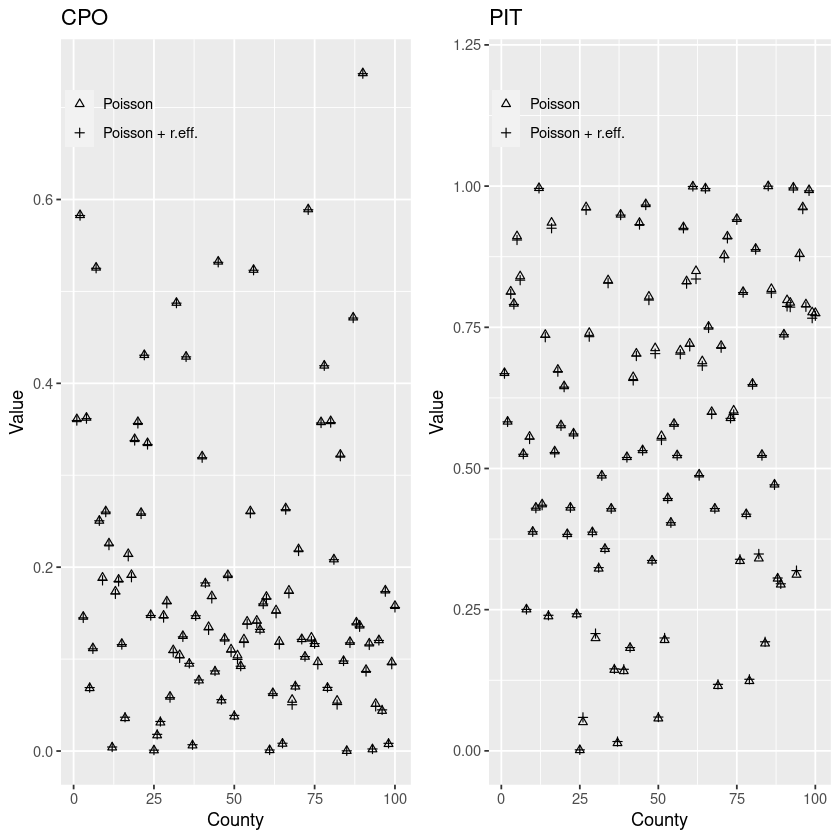

In [8]:
## ----fig = TRUE, echo = FALSE, eval = TRUE, label = "nc-sids-CPO", fig.cap = "Values of CPOs and PITs computed for the models fit to the North Carolina SIDS data.", fig.width = 8, fig.height = 4.75----

# ggplot version
library("ggplot2")
library("gridExtra")

tab <- data.frame(county = rep(1:100, 2), 
  cpo = c(m.pois$cpo$cpo, m.poisover$cpo$cpo),
  pit = c(m.pois$cpo$pit, m.poisover$cpo$pit))
tab$model <- rep(c("Poisson", "Poisson + r.eff."), each = 100)

# CPO
p1 <- ggplot(tab, aes(x = county, y = cpo, shape = model)) +
  geom_point() +
  scale_shape_manual(values = c(2, 3)) +
  theme(legend.position = c(0.2, 0.9), legend.title = element_blank(),
    legend.background = element_rect(fill = "transparent")) +
  ggtitle("CPO") +
  xlab("County") + ylab("Value")

# PIT
p2 <- ggplot(tab, aes(x = county, y = pit, shape = model)) +
  geom_point() +
  scale_shape_manual(values = c(2, 3)) +
  theme(legend.position = c(0.2, 0.9), legend.title = element_blank(),
    legend.background = element_rect(fill = "transparent")) +
  ggtitle("PIT") +
  xlab("County") + ylab("Value") +
  ylim(0, 1.2)

grid.arrange(p1, p2, ncol = 2)

In [10]:


## -----------------------------------------------------------------------------
m.strategy <- lapply(c("gaussian", "simplified.laplace", "laplace"), 
  function(st) {
    return(lapply(c("ccd", "grid", "eb"), function(int.st) {
      inla(SID74 ~ NWPROP74 + f(CNTY.ID, model = "iid"),
        data = nc.sids, family = "poisson", E = EXP74,
        control.inla = list(strategy = st, int.strategy = int.st),
        control.compute = list(cpo = TRUE, dic = TRUE, waic = TRUE))
    }))
})

In [11]:

## ----echo = FALSE, fig = TRUE, label = "stintercept", fig.cap = '(ref:stintercept)', fig.height = 3.45, fitg.height = 6----
# Colors using the viridis palette
library("viridis")
intst.colors <- magma(4) #4 to remove yellow


In [12]:

# ggplot version

marg.beta <- lapply(m.strategy, function(X) {
  do.call(rbind, lapply(X, function(Y) {Y$marginals.fixed[[1]]}))
})
marg.beta <- as.data.frame(do.call(rbind, marg.beta))

In [16]:
m.strategy[[1]][[1]]$marginals.fixed[[1]]

x,y
-1.0915021,0.0004112042
-1.0312585,0.0035507166
-0.9618824,0.0306067527
-0.8786910,0.2464230933
-0.8392022,0.5441833699
-0.8054173,0.9653179791
-0.7666366,1.6506389395
-0.7405528,2.1985958933
-0.7198595,2.6441545146
-0.7021264,3.0044921373


In [13]:
marg.beta

x,y
<dbl>,<dbl>
-1.0915021,0.0004112042
-1.0312585,0.0035507166
-0.9618824,0.0306067527
-0.8786910,0.2464230933
-0.8392022,0.5441833699
-0.8054173,0.9653179791
-0.7666366,1.6506389395
-0.7405528,2.1985958933
-0.7198595,2.6441545146


In [ ]:

marg.beta$strategy <- rep(c("gaussian", "simplified.laplace", "laplace"),
  each = 3 * 75)
marg.beta$strategy <- factor(marg.beta$strategy,
  levels = c("gaussian", "simplified.laplace", "laplace"))
marg.beta$int.strategy <- rep(rep( c("ccd", "grid", "eb"), each = 75), 3)
marg.beta$int.strategy <- factor(marg.beta$int.strategy,
  levels = c("ccd", "grid", "eb"))


ggplot(marg.beta, aes(x = x, y = y, linetype = strategy, 
    colour = int.strategy)) +
  geom_line() +
  xlim(-1.2, -0.2) + ylim(0, 5) +
  xlab(expression(beta[0])) +
  ylab(expression(paste(pi, "(", beta[0], " | ", bold(y), ")")) ) +
  scale_linetype_manual(values = c("solid", "dashed", "dotted")) +
  scale_colour_manual(values = intst.colors) +
  theme(legend.position = c(0.15, 0.65),
    legend.background = element_rect(fill = "transparent"),
    legend.title = element_blank())

